# Draft 1 - Figure 2

_Description of our goal:_  

a. Cone plots in select regions with obs. unc. to ICV unc. ratio, b. trends zeroed to ToE, and maybe c. evolution of obs. Unc.

In [1]:
import sys,warnings
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/internalvar-vs-obsunc/')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/internalvar-vs-obsunc/Common/')

from imports import (
    np, xr, plt, sns, os,
    glob, dask
    )

from functions import (
    to_png
    )

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def compute_tte(obs_trends,pic_trends):
    '''
    General function comparing the observed trends with the PIC trends to determine TTE.
    '''
    
    _tte_bool = obs_trends > pic_trends
    _tte      = 1960 + _tte_bool.duration.where(~_tte_bool).max(dim='duration')
    _tte      = _tte.where(_tte!=1960+obs_trends.duration.max(),np.nan) # Mask the unemerged regions
    _tte      = _tte.drop(['percentile'])
    
    return _tte

## Spatial (5x5 deg.) Data

### Load processed trend data

#### Models

In [3]:
# I need to go from the CAM output variables to the CMOR/CMIP standard names.
pic_tseries_dir = '/glade/work/jonahshaw/trend_uncertainty/nathan/CMIP6_PIC/'
cesm1_dir       = 'CESM1/'
mpi_dir         = 'MPI-GE/'
canesm2_dir     = 'CanESM2/'
esm2m_dir       = 'ESM2M/'

cesm1_cmor_var_dict = {'ts':'TS','tas':'TREFHT','psl':'PSL'}

In [4]:
cesm1_spatial_trends_filepath   = glob.glob('%s/%s/*5x5degSpatialTrends.Percentiles*.nc' % (pic_tseries_dir,cesm1_dir))
mpi_spatial_trends_filepath     = glob.glob('%s/%s/*5x5degSpatialTrends.Percentiles*.nc' % (pic_tseries_dir,mpi_dir))
canesm2_spatial_trends_filepath = glob.glob('%s/%s/*5x5degSpatialTrends.Percentiles*.nc' % (pic_tseries_dir,canesm2_dir))
esm2m_spatial_trends_filepath   = glob.glob('%s/%s/*5x5degSpatialTrends.Percentiles*.nc' % (pic_tseries_dir,esm2m_dir))

In [5]:
cesm1_regional_trends_filepath   = glob.glob('%s/%s/*.trends.Percentiles*.nc' % (pic_tseries_dir,cesm1_dir))
mpi_regional_trends_filepath     = glob.glob('%s/%s/*.trends.Percentiles*.nc' % (pic_tseries_dir,mpi_dir))
canesm2_regional_trends_filepath = glob.glob('%s/%s/*.trends.Percentiles*.nc' % (pic_tseries_dir,canesm2_dir))
esm2m_regional_trends_filepath   = glob.glob('%s/%s/*.trends.Percentiles*.nc' % (pic_tseries_dir,esm2m_dir))

Load the trend data.

In [6]:
cesm1_pic_spatial_trends_all   = xr.open_dataarray(*cesm1_spatial_trends_filepath)

mpi_pic_spatial_trends_all     = xr.open_dataarray(*mpi_spatial_trends_filepath)

canesm2_pic_spatial_trends_all = xr.open_dataarray(*canesm2_spatial_trends_filepath)

esm2m_pic_spatial_trends_all   = xr.open_dataarray(*esm2m_spatial_trends_filepath)

In [7]:
cesm1_pic_regional_trends_all   = xr.open_dataarray(*cesm1_regional_trends_filepath)

mpi_pic_regional_trends_all     = xr.open_dataarray(*mpi_regional_trends_filepath)

canesm2_pic_regional_trends_all = xr.open_dataarray(*canesm2_regional_trends_filepath)

esm2m_pic_regional_trends_all   = xr.open_dataarray(*esm2m_regional_trends_filepath)

#### Observations

In [8]:
obs_tseries_dir = '/glade/work/jonahshaw/trend_uncertainty/nathan/OBS_LENS/'
gistemp_5x5_dir = 'GISTEMP_5x5/'
hadcrut5_dir    = 'HadCRUT5/'

In [9]:
gistemp_tas_var = 'tempAnom'
hadcrut5_tas_var = 'tas'

In [10]:
gistemp_5x5_spatial_trends_filepath  = glob.glob('%s/%s/*Spatial*.Percentiles*.nc' % (obs_tseries_dir,gistemp_5x5_dir))
hadcrut5_spatial_trends_filepath     = glob.glob('%s/%s/*Spatial*.Percentiles*.nc' % (obs_tseries_dir,hadcrut5_dir))

In [11]:
gistemp_5x5_regional_trends_filepath  = glob.glob('%s/%s/*.196001-202012.trends.Percentiles*.nc' % (obs_tseries_dir,gistemp_5x5_dir))
hadcrut5_regional_trends_filepath     = glob.glob('%s/%s/*.196001-202012.trends.Percentiles*.nc' % (obs_tseries_dir,hadcrut5_dir))

Load the trend data

In [12]:
gistemp_5x5_spatial_trends_all  = xr.open_dataarray(*gistemp_5x5_spatial_trends_filepath).drop('startyear')
hadcrut5_spatial_trends_all     = xr.open_dataarray(*hadcrut5_spatial_trends_filepath).drop('startyear').rename({'longitude':'lon','latitude':'lat'})

In [13]:
gistemp_5x5_regional_trends_all  = xr.open_dataarray(*gistemp_5x5_regional_trends_filepath).drop('startyear')
hadcrut5_regional_trends_all     = xr.open_dataarray(*hadcrut5_regional_trends_filepath).drop('startyear')

In [14]:
cesm1_pic_spatial_trends_all   = xr.open_dataarray(*cesm1_spatial_trends_filepath)

mpi_pic_spatial_trends_all     = xr.open_dataarray(*mpi_spatial_trends_filepath)

canesm2_pic_spatial_trends_all = xr.open_dataarray(*canesm2_spatial_trends_filepath)

esm2m_pic_spatial_trends_all   = xr.open_dataarray(*esm2m_spatial_trends_filepath)

In [15]:
cesm1_pic_regional_trends_all   = xr.open_dataarray(*cesm1_regional_trends_filepath)

mpi_pic_regional_trends_all     = xr.open_dataarray(*mpi_regional_trends_filepath)

canesm2_pic_regional_trends_all = xr.open_dataarray(*canesm2_regional_trends_filepath)

esm2m_pic_regional_trends_all   = xr.open_dataarray(*esm2m_regional_trends_filepath)

### Compute TTE generally

In [16]:
obs_spatial_trend_percentiles_dict  = {'GISTEMP_5x5':gistemp_5x5_spatial_trends_all,
                                       'HadCRUT':hadcrut5_spatial_trends_all}
obs_regional_trend_percentiles_dict = {'GISTEMP_5x5':gistemp_5x5_regional_trends_all,
                                       'HadCRUT':hadcrut5_regional_trends_all}
obs_trend_percentiles_dict          = {'spatial':obs_spatial_trend_percentiles_dict,
                                       'regional':obs_regional_trend_percentiles_dict}

model_spatial_trend_percentiles_dict = {'CESM1':cesm1_pic_spatial_trends_all,
                                        'MPI':mpi_pic_spatial_trends_all,
                                        'CanESM2':canesm2_pic_spatial_trends_all,
                                        'ESM2M':esm2m_pic_spatial_trends_all}

model_regional_trend_percentiles_dict = {'CESM1':cesm1_pic_regional_trends_all,
                                         'MPI':mpi_pic_regional_trends_all,
                                         'CanESM2':canesm2_pic_regional_trends_all,
                                         'ESM2M':esm2m_pic_regional_trends_all}
model_trend_percentiles_dict          = {'spatial':model_spatial_trend_percentiles_dict,
                                         'regional':model_regional_trend_percentiles_dict}

In [17]:
%%time 

spatial_box = []
regional_box = []

# Iterate over regional vs. spatial
for _location_type in list(obs_trend_percentiles_dict.keys()):
    
    print(_location_type)
    _box = spatial_box if (_location_type == 'spatial') else regional_box
    location_box = []
    
    _allobs_trend_percentiles = obs_trend_percentiles_dict[_location_type]
    _allmodel_trend_percentiles = model_trend_percentiles_dict[_location_type]
    
    for _obs_product in list(_allobs_trend_percentiles.keys()):
        print(_obs_product)
        obs_box = []
        
        _obs_trend_percentiles = _allobs_trend_percentiles[_obs_product]
        
        for _model_product in list(_allmodel_trend_percentiles.keys()):
            print(_model_product)
            _model_trend_percentiles = _allmodel_trend_percentiles[_model_product]
            
            _mean_toe = compute_tte(obs_trends=_obs_trend_percentiles.sel(percentile=50.0),
                                    pic_trends=_model_trend_percentiles.sel(percentile=97.5))
            
            _strict_toe = compute_tte(obs_trends=_obs_trend_percentiles.sel(percentile=2.5),
                                      pic_trends=_model_trend_percentiles.sel(percentile=97.5))
            
            # Compute the delay and conditional delay mask:
            _delay_toe = _strict_toe - _mean_toe # Compute the delay
            _delay_undef_region = np.bitwise_and(np.isnan(_strict_toe), ~np.isnan(_mean_toe)) # Mask for where tas is emerged in the mean but not the "strict" sense.
            _delay_toe = xr.where(_delay_undef_region,2020 - _mean_toe,_delay_toe) # Apply the conditional mask

            _toes = xr.concat([_mean_toe.assign_coords({'metric':'mean'},).expand_dims(['metric'],axis=[-1]),
                               _strict_toe.assign_coords({'metric':'strict'},).expand_dims(['metric'],axis=[-1]),
                               _delay_toe.assign_coords({'metric':'delay'},).expand_dims(['metric'],axis=[-1]),
                               _delay_undef_region.assign_coords({'metric':'delay_mask'},).expand_dims(['metric'],axis=[-1]),
                              ],
                              dim='metric',
                             )            
                              
            obs_box.append(_toes.assign_coords({'model':_model_product},).expand_dims(['model'],axis=[-1]))
                        
        location_box.append(xr.concat(obs_box,dim='model').assign_coords({'obs':_obs_product},).expand_dims(['obs'],axis=[-1]))
        
    _box.append(xr.concat(location_box,dim='obs'))
    # _box.append(xr.concat(location_box,dim='obs').assign_coords({'location':_location_type},).expand_dims(['location'],axis=[-1]))    

spatial
GISTEMP_5x5
CESM1
MPI
CanESM2
ESM2M
HadCRUT
CESM1
MPI
CanESM2
ESM2M
regional
GISTEMP_5x5
CESM1
MPI
CanESM2
ESM2M
HadCRUT
CESM1
MPI
CanESM2
ESM2M
CPU times: user 362 ms, sys: 16.4 ms, total: 379 ms
Wall time: 437 ms


In [19]:
cesm1_pic_95confspread   = cesm1_pic_regional_trends_all.sel(percentile=97.5) - cesm1_pic_regional_trends_all.sel(percentile=2.5)
gistemp_reg_95confspread = gistemp_5x5_regional_trends_all.sel(percentile=97.5) - gistemp_5x5_regional_trends_all.sel(percentile=2.5)

gistemp_cesm1_uncratio = gistemp_reg_95confspread / cesm1_pic_95confspread

In [20]:
gistemp_5x5_trends_50perc_reindex = gistemp_5x5_regional_trends_all.sel(percentile=50.0).copy()
regional_tte_data = regional_box[0]

mean_tte  = regional_tte_data.sel(model='CESM1',obs='GISTEMP_5x5',metric='mean')
strict_tte = regional_tte_data.sel(model='CESM1',obs='GISTEMP_5x5',metric='strict')

reindexed_trends = []
for region_index in gistemp_5x5_trends_50perc_reindex.RegionIndex:

    region_trends = gistemp_5x5_trends_50perc_reindex.sel(RegionIndex=region_index)
    region_mean_tte = mean_tte.sel(RegionIndex=region_index)
    
    region_trends['years_since_emerge'] = 1960 + region_trends.duration - 1 - region_mean_tte
    
    reindexed_trends.append(region_trends)    

reindexed_trends_concat = xr.concat(reindexed_trends,dim='RegionIndex')

In [21]:
mean_delay_trends = []

for delay in range(int(reindexed_trends_concat.years_since_emerge.min()),int(reindexed_trends_concat.years_since_emerge.max())):
    
    delay_mean_value = reindexed_trends_concat.where(reindexed_trends_concat.years_since_emerge==delay).mean()
    
    mean_delay_trends.append(delay_mean_value.values)

delay_range = np.arange(int(reindexed_trends_concat.years_since_emerge.min()),int(reindexed_trends_concat.years_since_emerge.max()))

delay_da = xr.DataArray(
    data=mean_delay_trends,
    dims=["delay",],
    coords={'delay':delay_range}
)

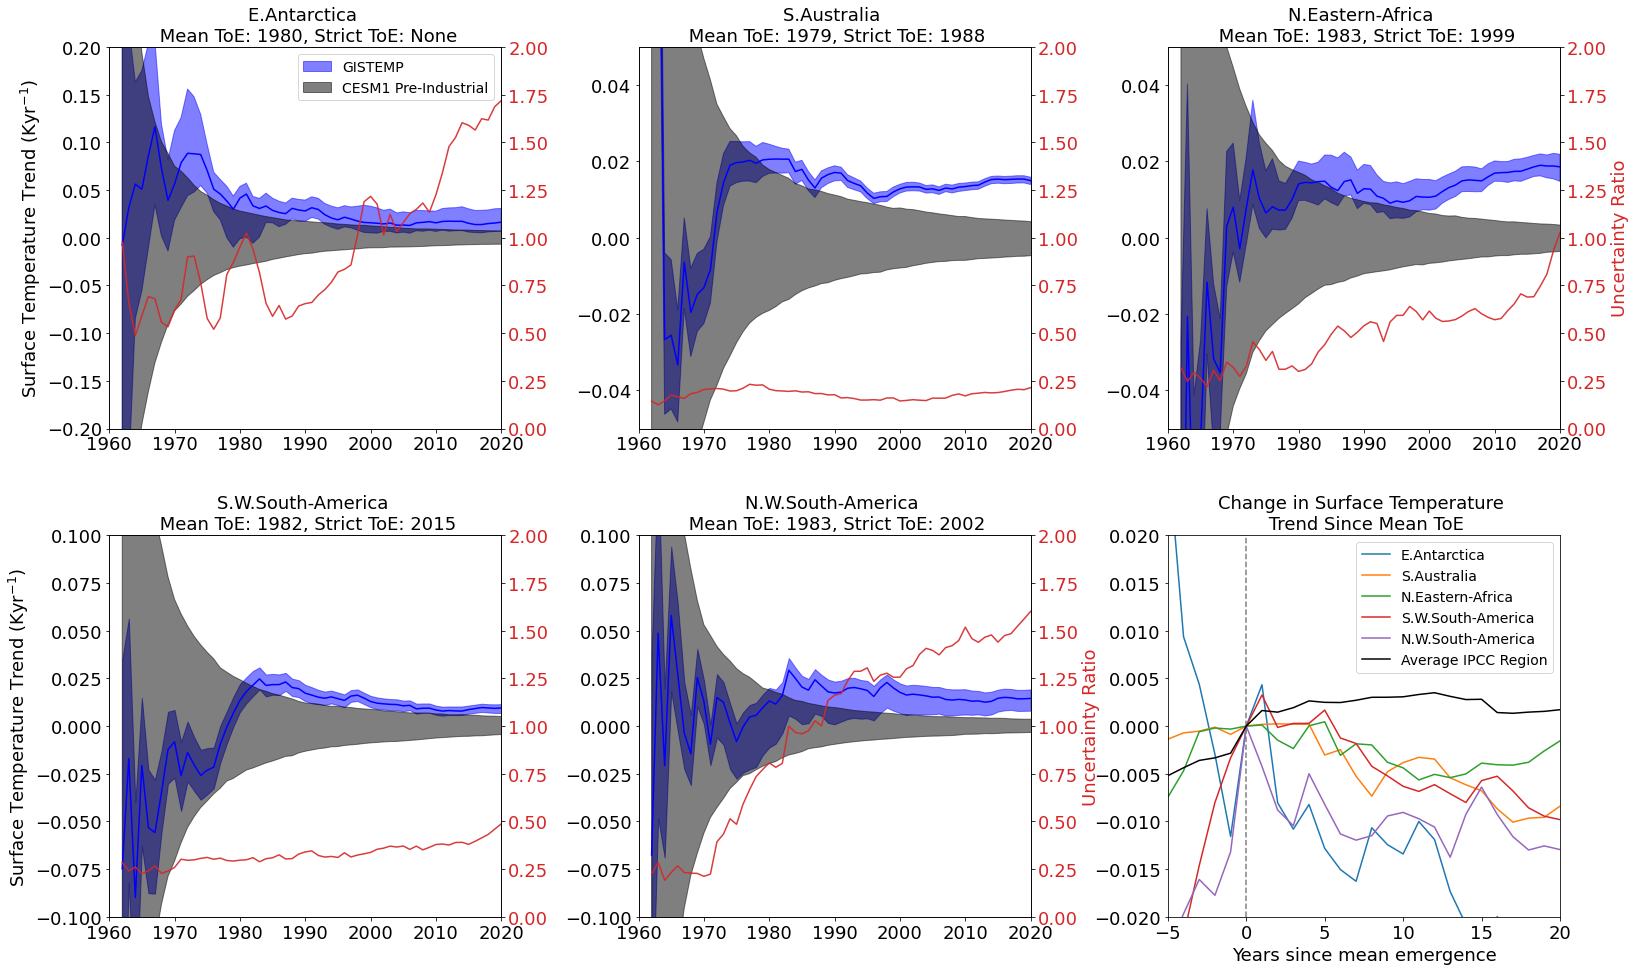

In [22]:
fig,axs = plt.subplots(2,3,figsize=(26,16))
axs = axs.flat

fig.subplots_adjust(hspace=0.28,wspace=0.35)

# Set values here:
region_indices = [44,42,23,13,9]
region_ylims   = [[-0.2,0.2],[-0.05,0.05],[-0.05,0.05],[-0.1,0.1],[-0.1,0.1],]

obs_percentile_data   = gistemp_5x5_regional_trends_all
model_percentile_data = cesm1_pic_regional_trends_all

year_gistemp = 1960 + obs_percentile_data.duration - 1
year_cesm1   = 1960 + model_percentile_data.duration - 1

axs2 = []

for region_index,ylim,ax in zip(region_indices,region_ylims,axs):
    
    # Compute the mean and strict ToEs
    _mean_tte        = mean_tte.sel(RegionIndex=region_index)
    _strict_tte      = strict_tte.sel(RegionIndex=region_index)
    _gistemp_cesm1_uncratio = gistemp_cesm1_uncratio.sel(RegionIndex=region_index)
    
    if (_strict_tte == 2020): _strict_tte = np.nan #xr.where(part_undef_gistemp,2020 - mean_tte_gistemp,np.nan)

    ax.fill_between(year_gistemp,
                    obs_percentile_data.sel(percentile=2.5,RegionIndex=region_index),
                    obs_percentile_data.sel(percentile=97.5,RegionIndex=region_index),
                    color='blue',
                    alpha=0.5,
                    label='GISTEMP',
                   )

    ax.fill_between(year_cesm1,
                    model_percentile_data.sel(percentile=2.5,RegionIndex=region_index),
                    model_percentile_data.sel(percentile=97.5,RegionIndex=region_index),
                    # cesm1_pic_trends_97_5perc.sel(RegionIndex=region_index),
                    color='black',
                    alpha=0.5,
                    label='CESM1 Pre-Industrial',
                   )

    ax.plot(year_gistemp,
            obs_percentile_data.sel(percentile=50.0,RegionIndex=region_index),
            # gistemp_5x5_trends_50perc.sel(RegionIndex=region_index),
            color='blue'
           )

    ax.tick_params(axis='both', labelsize=18)

    # ax.set_ylabel('Surface Temperature Trend (Kyr$^{-1}$)',fontsize=18)
    # ax.set_xlabel('Year',fontsize=18)

    ax.set_xlim(1960,2020)
    # ax.set_xlim(1963,2020)
    ax.set_ylim(ylim)
    
    # Set up another y-axis on the right side of the plot
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    # ax2.set_ylabel('Uncertainty Ratio', color=color,fontsize=18)  # we already handled the x-label with ax1
    ax2.plot(1960+gistemp_cesm1_uncratio.duration - 1, _gistemp_cesm1_uncratio, color=color,alpha=0.9)#,linestyle='dashed')
    ax2.set_ylim([0,2])
    ax2.tick_params(axis='y', labelcolor=color,labelsize=18)        

    title_p1 = str(obs_percentile_data.sel(RegionIndex=region_index).RegionName.values)
    if np.isnan(_strict_tte):
        title_p2 = 'Mean ToE: %d, Strict ToE: None' % (_mean_tte)
    else:
        title_p2 = 'Mean ToE: %d, Strict ToE: %d' % (_mean_tte,_strict_tte)
    # title_p2 = 'Mean ToE: %d, Strict ToE: %s' % (_mean_tte.values,_strict_tte.values)
    # title_p2 = 'Mean ToE: %d, Strict ToE: %d' % (mean_tte,strict_tte)
    # title_p2 = 'Mean ToE: %d, Strict ToE: %s' % (mean_tte,str(np.round(strict_tte.values,0)))

    ax.set_title('%s \n %s' % (title_p1,title_p2),fontsize=18)
    
    axs2.append(ax2)

axs[0].set_ylabel('Surface Temperature Trend (Kyr$^{-1}$)',fontsize=18)
axs[3].set_ylabel('Surface Temperature Trend (Kyr$^{-1}$)',fontsize=18)

axs2[2].set_ylabel('Uncertainty Ratio', color=color,fontsize=18)
axs2[4].set_ylabel('Uncertainty Ratio', color=color,fontsize=18)
# axs2[5].set_ylabel('Uncertainty Ratio', color=color,fontsize=18)

axs[0].legend(fontsize=14)
    
for region_index in region_indices:
    
    # Plot the trends shifted to the time of emergence
    region_trends = obs_percentile_data.sel(percentile=50.0,RegionIndex=region_index) # Select region
    region_mean_tte = mean_tte.sel(RegionIndex=region_index) # Get ToE
    duration_at_emergence = region_mean_tte-1960+1 # Get the duration of trends at ToE
    region_trends_corrected = region_trends - region_trends.sel(duration=duration_at_emergence) # shift the trends to the ToE year
            
    # Correct for the trends changing 
    year_from_toe = 1960 + region_trends_corrected.duration - 1 # shift the year to the ToE year
    axs[5].plot(year_from_toe - region_mean_tte,region_trends_corrected,label=region_trends_corrected.RegionName.values)    

axs[5].plot(delay_da.delay,delay_da-delay_da.sel(delay=0),color='black',label='Average IPCC Region')
    
axs[5].vlines(0,-0.02,0.05,color='grey',linestyle='dashed',zorder=-1)
axs[5].set_xlim(-5,20)
axs[5].set_ylim(-0.02,0.02)

axs[5].set_xlabel('Years since mean emergence',fontsize=18)
# axs[5].set_ylabel('Change in Surface Temperature Trend Since Emergence (Kyr$^{-1}$)',fontsize=18)
axs[5].set_title('Change in Surface Temperature \n Trend Since Mean ToE',fontsize=18)
axs[5].tick_params(axis='both',labelsize=18)        

axs[5].legend(fontsize=14)

In [24]:
to_png(file=fig,filename='draft1_fig2_cones',dpi=300,ext='png',bbox_inches='tight') # or .pdf 